In [1]:
## We get geography data from 
## https://analytics.wikimedia.org/published/datasets/knowledge_gaps/content_gaps/knowledge_gap_index_metrics_csv/ 
## Use latest snapshot of data available in the folder content_gap=geography_wmf_region/


import pandas as pd
indir='Data/'
#this contains the list of all Wikipedia languages
wikis=pd.read_csv(indir+'wikis')
import matplotlib.pyplot as plt
import numpy as np

## Loading and preprocessing data


In [4]:
#Loading Geo Data
#geodata=pd.read_csv(indir+'geography-june.csv')

# Use the link to load data to avoid truncation of the csv due to file size instead of downloading the csv
geodata=pd.read_csv("https://analytics.wikimedia.org/published/datasets/knowledge_gaps/content_gaps/knowledge_gap_index_metrics_csv/content_gap=geography_wmf_region/part-00000-2325150f-05fd-47e9-bfe4-08fae3eb635a.c000.csv")
geodata=geodata[geodata.wiki_db.isin(list(wikis['database_code']))]
#geodata=geodata.join(mappings['wmf_region'],on='category')

## First, Current snapshot as of today (geo)

In [10]:
geosnapshot=geodata[geodata.time_bucket=='2023-07'].groupby('category')['standard_quality_count_value'].sum().reset_index()
geosnapshot


,category,standard_quality_count_value
0,Central & Eastern Europe & Central Asia,242099
1,"East, Southeast Asia, & Pacific",160579
2,Latin America & Caribbean,59547
3,Middle East & North Africa,36151
4,North America,178579
5,Northern & Western Europe,545846
6,South Asia,43016
7,Sub-Saharan Africa,27690
8,UNCLASSED,265


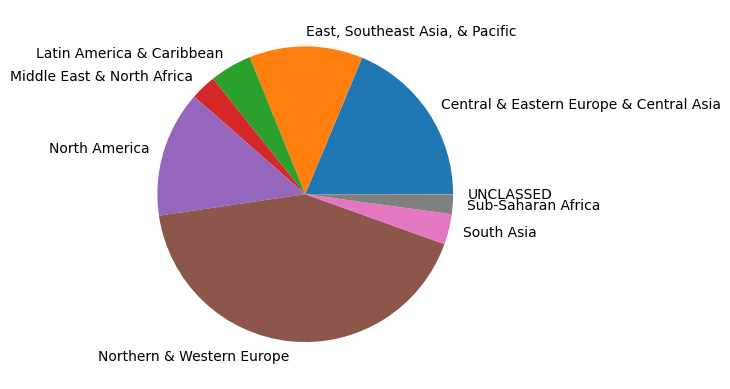

In [11]:
plt.pie(geosnapshot['standard_quality_count_value'], labels = geosnapshot['category'])
plt.show()

In [12]:
count={}
qual={}
for country in geodata['category'].unique():
    count[country]=geodata[geodata['category']==country].groupby(['time_bucket'])['article_created_value'].sum()
    count[country]=count[country].cumsum()
    qual[country]=geodata[geodata['category']==country].groupby(['time_bucket'])['standard_quality_count_value'].sum()

In [13]:
counts=pd.DataFrame(count)
qualities=pd.DataFrame(qual)

In [14]:
#rolling 3 month average
qualities.rolling(window=3).mean().diff(12).to_csv('qualities_diff_geo_new.csv')


In [16]:
counts.to_csv('counts_geo.tsv')
qualities.to_csv('qualities_geo.tsv')

In [15]:
qualities

,Central & Eastern Europe & Central Asia,"East, Southeast Asia, & Pacific",Latin America & Caribbean,Middle East & North Africa,North America,Northern & Western Europe,South Asia,Sub-Saharan Africa,UNCLASSED
time_bucket,,,,,,,,,
2001-01,0,0,0,0,0,0,0,0,0
2001-02,0,0,0,0,0,0,0,0,0
2001-03,0,0,0,0,0,0,0,0,0
2001-04,0,0,0,0,0,0,0,0,0
2001-05,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-04,237329,157716,58877,35397,176448,538014,41847,26931,265
2023-05,238893,158628,59082,35641,177111,541152,42284,27182,265
2023-06,240474,159559,59330,35917,177768,543572,42686,27433,265
